## #install necessary libraries
 #!pip install pandas numpy matplotlib seaborn scikit-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## #Load the dataset


In [4]:
df=pd.read_csv('/content/drive/MyDrive/customer_data.csv')



## display the first few rows of the dataset


In [5]:
print("first 5 rows of the dataset:")
print(df.head())



first 5 rows of the dataset:
   Customer ID  Age  Annual Income  Spending Score
0            1   56          81228              84
1            2   69         134752              30
2            3   46          68984              62
3            4   32          60774              75
4            5   60          22568              92


## display basic information about the dataset


In [6]:
print("\nDataset Info:")
print(df.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     35 non-null     int64
 1   Age             35 non-null     int64
 2   Annual Income   35 non-null     int64
 3   Spending Score  35 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB
None


### check for missing values


In [7]:
print("\nMissing values in dataset:")
print(df.isnull().sum())




Missing values in dataset:
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


### select relevant columns(eg, Age,Annual Income,Spending Score)


In [8]:
features = df[['Age','Annual Income','Spending Score']]




## standardize the data


In [9]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)


### display the first few rows of the standardized data


In [10]:
print("\nfirst 5 rows of scaled features:")
print(scaled_features[:5])




first 5 rows of scaled features:
[[ 0.95357952  0.10285656  1.05310611]
 [ 1.92422534  1.47640368 -0.83350105]
 [ 0.20692889 -0.21135222  0.28448838]
 [-0.838382   -0.42203942  0.73867159]
 [ 1.25223977 -1.40249195  1.33260347]]


## Elbow Method to find the optimal number of clusters


In [28]:
wcss = []
k_range = range(1,11)


In [29]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_) #inertia_ = WCSS


### plot the Elbow Method graph


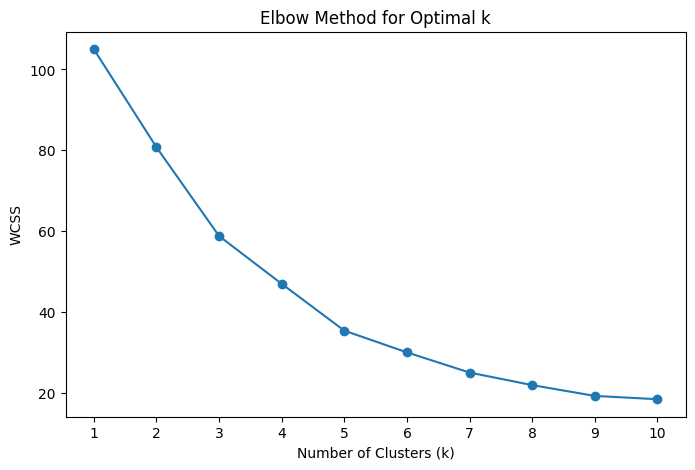

In [30]:
plt.figure(figsize=(8,5))
plt.plot(k_range,wcss,marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.show()

### perform K-Means clustering with the optimal k (from the elbow method,assume k=3 here)

In [31]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


### add cluster labels to the original dataset

In [32]:
df['Cluster'] = cluster_labels


### display the first few rows with cluster labels

In [33]:
print("\nFirst 5 rows with cluster labels:")
print(df.head())



First 5 rows with cluster labels:
   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   56          81228              84        0
1            2   69         134752              30        2
2            3   46          68984              62        0
3            4   32          60774              75        1
4            5   60          22568              92        0


### visualize clusters(using the first two features for plotting) 2D scatter plot

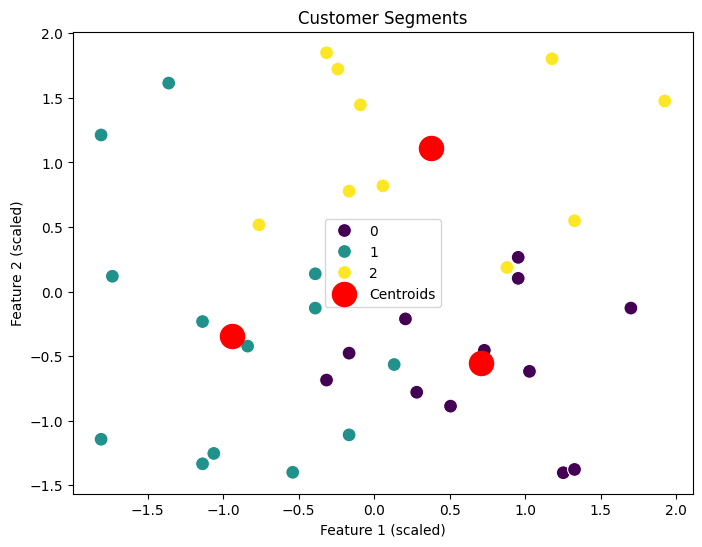

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=cluster_labels,palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

### First, add cluster labels to the original DataFrame (pair plot)

In [35]:
df['Cluster'] = cluster_labels


### Pair plot of features colored by cluster

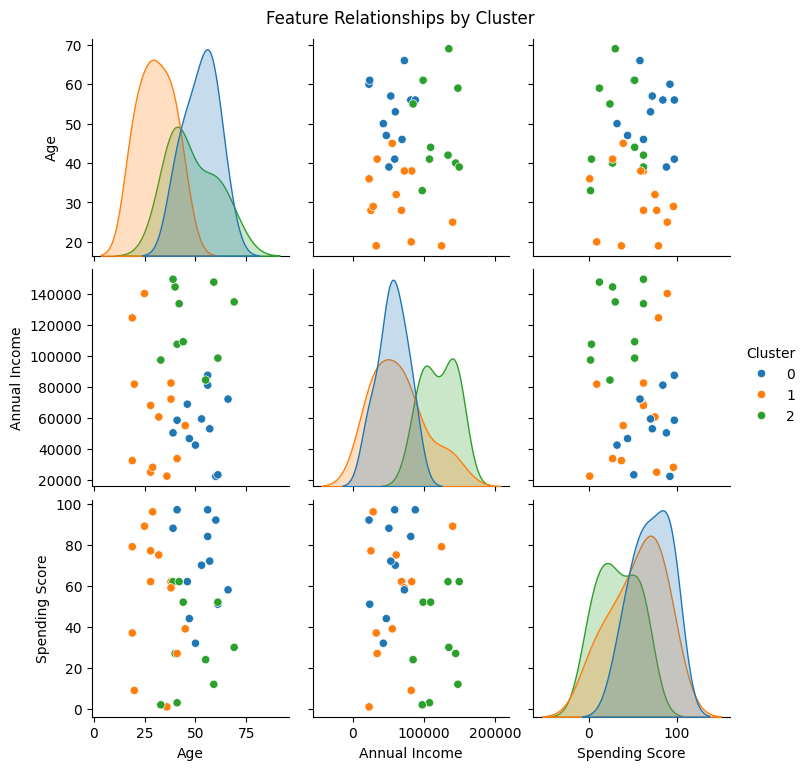

In [36]:
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']],
             hue='Cluster', palette='tab10')
plt.suptitle('Feature Relationships by Cluster', y=1.02)
plt.show()


### Get mean values of each feature per cluster(centroid visuals)

In [37]:
centroids_df = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()


### Plot bar chart for centroids

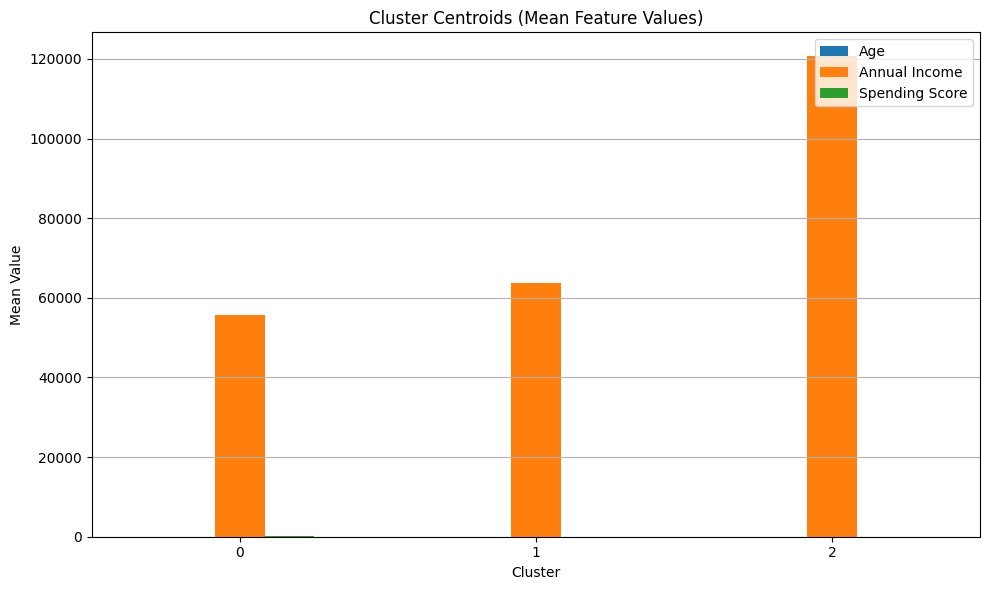

In [38]:
centroids_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centroids (Mean Feature Values)')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()